In [18]:
import numpy as np
from random import uniform
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

In [19]:
def generate_time_series_data(n):
    return np.sin(n + np.sin(n)**2)

input_samples = []
output_labels = []

input_range = 10 #pra cada ponto, olharemos 10 pontos antes
step_size = 0.3#amostras de valores entre n-8 até n e variando 0.3 entre cada valor
for n in range(0, 40):
    input_data = []
    output_data = []
    for x in np.arange(n - input_range, n, step_size):
        input_data.append(generate_time_series_data(x))
    input_samples.append(input_data)
    for y in np.arange(n, n + 3, step_size):
        output_data.append(generate_time_series_data(y))
    output_labels.append(output_data)


In [20]:
input_samples = np.array(input_samples)
output_labels = np.array(output_labels)

In [21]:
train_input, test_input, train_output, test_output = train_test_split(input_samples, output_labels, test_size=0.2, random_state=33)
print(train_input.shape)
print(train_output.shape)

(32, 34)
(32, 10)


In [22]:
neural_network_model = Sequential([
    Dense(units=5, input_shape=(34,), activation='relu'),   
    Dense(units=10, activation='linear'),
])

In [23]:
neural_network_model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error', metrics=['mean_absolute_error'])

In [24]:
training_result = neural_network_model.fit(x=train_input, y=train_output, validation_split=0.2, batch_size=50, epochs=100, shuffle=True, verbose=2)

Epoch 1/100


1/1 - 1s - loss: 0.6317 - mean_absolute_error: 0.6385 - val_loss: 0.2906 - val_mean_absolute_error: 0.4373 - 532ms/epoch - 532ms/step
Epoch 2/100
1/1 - 0s - loss: 0.2945 - mean_absolute_error: 0.4538 - val_loss: 0.3514 - val_mean_absolute_error: 0.4763 - 32ms/epoch - 32ms/step
Epoch 3/100
1/1 - 0s - loss: 0.2973 - mean_absolute_error: 0.4574 - val_loss: 0.3116 - val_mean_absolute_error: 0.4276 - 24ms/epoch - 24ms/step
Epoch 4/100
1/1 - 0s - loss: 0.2336 - mean_absolute_error: 0.3810 - val_loss: 0.2471 - val_mean_absolute_error: 0.3898 - 37ms/epoch - 37ms/step
Epoch 5/100
1/1 - 0s - loss: 0.1827 - mean_absolute_error: 0.3303 - val_loss: 0.2473 - val_mean_absolute_error: 0.4106 - 36ms/epoch - 36ms/step
Epoch 6/100
1/1 - 0s - loss: 0.1972 - mean_absolute_error: 0.3567 - val_loss: 0.2118 - val_mean_absolute_error: 0.3822 - 41ms/epoch - 41ms/step
Epoch 7/100
1/1 - 0s - loss: 0.1743 - mean_absolute_error: 0.3372 - val_loss: 0.1644 - val_mean_absolute_error: 0.3331 - 31ms/epoch - 31ms/step
Ep

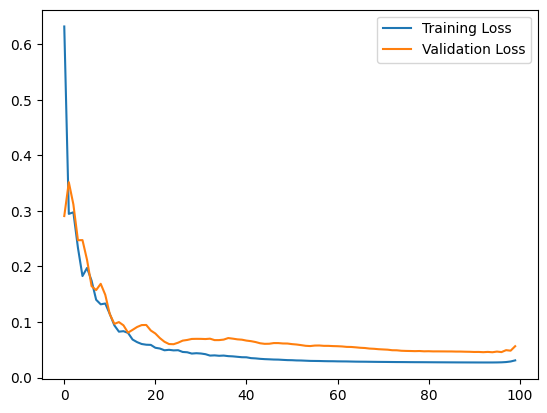

In [25]:
plt.plot(training_result.history['loss'], label='Training Loss')
plt.plot(training_result.history['val_loss'], label='Validation Loss')
plt.legend()